In [24]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sn

Pre-processing and creation of the datapoints

In [4]:
lowC = pd.read_csv("/notebooks/MLProject/data/Clean/ShareElectricityLowCarbon.csv", sep=";")
accessElec = pd.read_csv("/notebooks/MLProject/data/Clean/elecAccess.csv", sep=";")
popGrowth = pd.read_csv("/notebooks/MLProject/data/Clean/popGrowth.csv", sep=";")
energyUse = pd.read_csv("/notebooks/MLProject/data/Clean/energyUse.csv", sep=";")
GDP = pd.read_csv("/notebooks/MLProject/data/Clean/GDP.csv", sep=";")
population = pd.read_csv("/notebooks/MLProject/data/Clean/population.csv", sep=";")

totEmissions = pd.read_csv("/notebooks/MLProject/data/Clean/totEmissions.csv", sep=";")

lowC.at[0,"Year"] = 2000
lowC.at[1,"1990"] = 0

y = np.array([])

X = np.array([[0,0,0,0,0,0]])

names = np.array([])
for year in range(1990,2021):
    for code in lowC["Code"]:        
        X_1 = lowC.loc[lowC['Code'] == code][str(year)].values
        X_2 = accessElec.loc[accessElec['Country Code'] == code][str(year)].values
        X_3 = popGrowth.loc[popGrowth['Country Code'] == code][str(year)].values
        X_4 = energyUse.loc[energyUse['Code'] == code][str(year)].values
        X_5 = GDP.loc[GDP['Country Code'] == code][str(year)].values
        X_6 = population.loc[population['Country Code'] == code][str(year)].values
        
        if(len(X_1) == 1 and len(X_2) == 1 and len(X_3) == 1 and len(X_4) == 1 and len(X_5) == 1 and len(X_6) == 1 and len(totEmissions.loc[totEmissions['Country Code'] == code][str(year)].values)==1 ):
            X = np.vstack( (X, [ X_1[0],X_2[0],X_3[0],X_4[0],X_5[0],X_6[0] ]) )
            y = np.append(y, totEmissions.loc[totEmissions['Country Code'] == code][str(year)])
            names = np.append(names, code + str(year))

In [5]:
X_ = pd.DataFrame(X[1:])
X_.insert(6, "y", y, True)
X_.insert(7, "labels", names, True)
X_.head(5)

,0,1,2,3,4,5,y,labels
0,NaN,NaN,0.202434,2968.3160,NaN,10694796.0,11630.79506,AFG1990
1,0.000000,NaN,3.345144,1972.4146,3283.170843,11828638.0,43185.60921,AGO1990
2,86.363640,100.0000,1.799086,10214.5980,2549.746801,3286542.0,11181.07427,ALB1990
3,0.000000,100.0000,5.869033,181538.7700,83843.224680,1900151.0,78601.83891,ARE1990
4,49.264286,92.1548,1.456403,15718.7030,7183.583826,32637657.0,249188.76120,ARG1990


Final cleanup of NaN

In [6]:
X_ = X_.dropna()
X_.columns = ["lowC","accessElec","popGrowth","energyUse","GDP", "population","y","labels"]
X_ = X_.reset_index()
X_.head(5)

,index,lowC,accessElec,popGrowth,energyUse,GDP,population,y,labels
0,2,86.363640,100.0000,1.799086,10214.598,2549.746801,3286542.0,11181.07427,ALB1990
1,3,0.000000,100.0000,5.869033,181538.770,83843.224680,1900151.0,78601.83891,ARE1990
2,4,49.264286,92.1548,1.456403,15718.703,7183.583826,32637657.0,249188.76120,ARG1990
3,7,9.970221,100.0000,1.480047,60597.098,17381.440010,17065128.0,490531.25070,AUS1990
4,8,66.206894,100.0000,0.762002,43648.800,19473.081960,7677850.0,76630.27662,AUT1990


Some basic information about the dataset

In [7]:
X_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       4046 non-null   int64  
 1   lowC        4046 non-null   float64
 2   accessElec  4046 non-null   float64
 3   popGrowth   4046 non-null   float64
 4   energyUse   4046 non-null   float64
 5   GDP         4046 non-null   float64
 6   population  4046 non-null   float64
 7   y           4046 non-null   float64
 8   labels      4046 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 284.6+ KB


Some plot to test the data

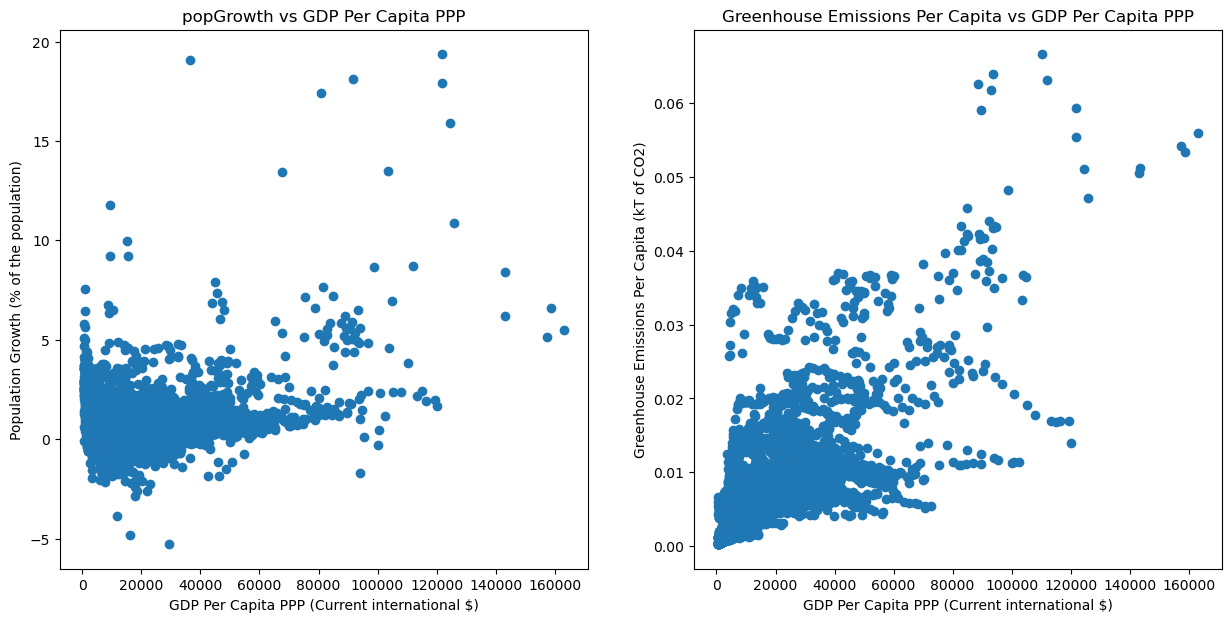

In [8]:
# Visualize data
fig, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].scatter(X_['GDP'], X_['popGrowth'])
axes[0].set_xlabel("GDP Per Capita PPP (Current international $)")
axes[0].set_ylabel("Population Growth (% of the population)")
axes[0].set_title("popGrowth vs GDP Per Capita PPP")

axes[1].scatter(X_['GDP'], X_['y'] / X_['population']) #use Emissions Per Capita to tackle the impact of the population size in the plot
axes[1].set_title('Greenhouse Emissions Per Capita vs GDP Per Capita PPP')
axes[1].set_xlabel("GDP Per Capita PPP (Current international $)")
axes[1].set_ylabel('Greenhouse Emissions Per Capita (kT of CO2)')
plt.show()

Correlation matrix

                lowC  accessElec  popGrowth  energyUse       GDP
lowC        1.000000   -0.133049  -0.107967  -0.116596 -0.112042
accessElec -0.133049    1.000000  -0.430143   0.454620  0.467831
popGrowth  -0.107967   -0.430143   1.000000   0.075040  0.081901
energyUse  -0.116596    0.454620   0.075040   1.000000  0.829737
GDP        -0.112042    0.467831   0.081901   0.829737  1.000000


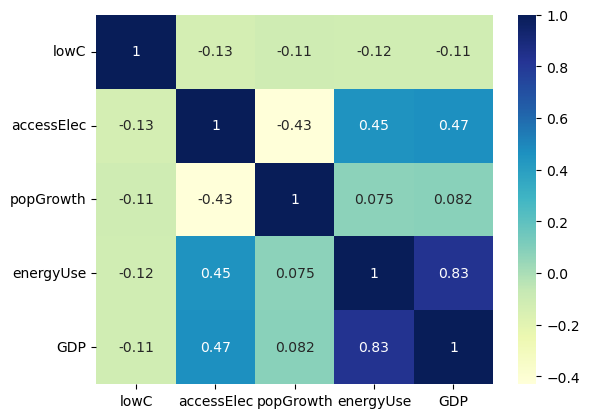

In [9]:
print(X_.iloc[:, 1:6].corr())
dataplot = sn.heatmap(X_.iloc[:, 1:6].corr(), cmap="YlGnBu", annot=True)

In [35]:
lin = LinearRegression()

v = lin.fit(X_[["GDP"]],X_["y"])
print(v.coef_)
print(v.intercept_)

plt.scatter(X_[["GDP"]],X_["y"])
plt.plot(

SyntaxError: incomplete input (1801765554.py, line 8)

In [29]:
y_pred = lin.predict(X_[["GDP"]])
error = mean_squared_error(X_["y"], y_pred)
print(error)

883067775708.8398
